Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not 
on the basis of the details provided in the dataset. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

614 rows and 13 columns

# Columns Analysis

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

most of the columns are in object and needs to be encoded

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Target variable description

In [14]:
df.Loan_ID.count()

614

Target column is Loan_Status

Loan_ID               This is an unique column and hence can be removed 

Gender                this talks about the gender but we see that repaying capacity is calculated with this column

Married               This marital status also an important factor to repay

Dependents            this column also predicts the repaying capacity

Education             This also an important factor for the loan decision 

Self_Employed         needed to decide the loan elegibility

ApplicantIncome       needed to decide the loan elegibility

CoapplicantIncome     This would be helpful for loan elegibility

LoanAmount            Loan amount is needed to decide on the loan status

Loan_Amount_Term      Repaying years 

Credit_History        kind of cibil score 

Property_Area         property details are needed to determine the loan elegibility 

Loan_Status           Target column

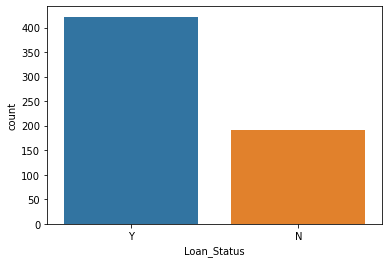

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Loan_Status",data=df)
plt.show()

This is a classification problem as there are only two derivatives 

As the yes and no of target variable has lot of difference this is a class imbalance problem

# dropping the loan id column

In [17]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [18]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# EDA

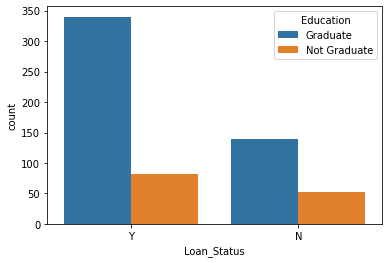

In [19]:
sns.countplot(x="Loan_Status",hue="Education",data=df)
plt.show()

loan status approval is mostly given to educated people

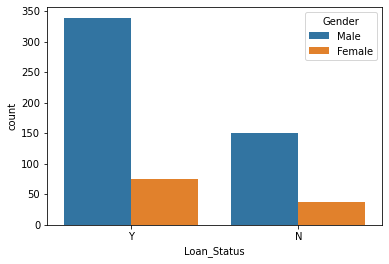

In [20]:
sns.countplot(x="Loan_Status",hue="Gender",data=df)
plt.show()

female candidates apply less for the loan when compared to males

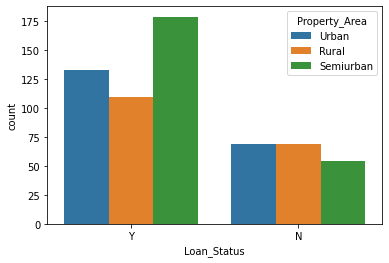

In [21]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)
plt.show()

we are not able to decided on the rejection as all the property area rejected is equally distributed

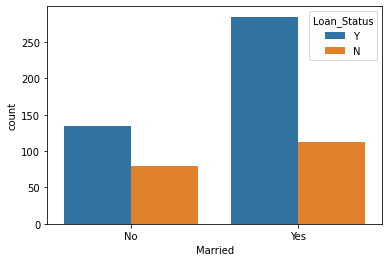

In [22]:
sns.countplot(x="Married",hue="Loan_Status",data=df)
plt.show()

Ratio of people gettting loans is high for amrried people

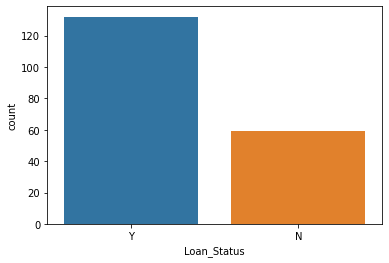

In [24]:
sns.countplot(x="Loan_Status",data=df.loc[df["ApplicantIncome"]>5000])
plt.show()

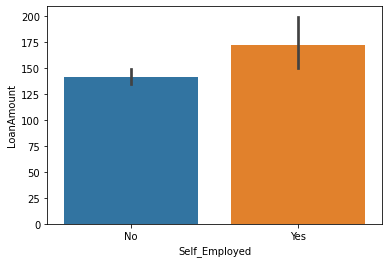

In [25]:
sns.barplot(y="LoanAmount",x="Self_Employed",data=df)
plt.show()

the loan amount sanctioned is more for self employed but the difference is less 

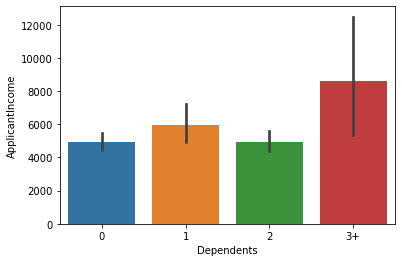

In [26]:
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

# Treating the Null values

In [28]:
for col in df.columns:
    if df[col].dtype=="object" and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [31]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

for the float variables we shall fill the nan values with 

In [36]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

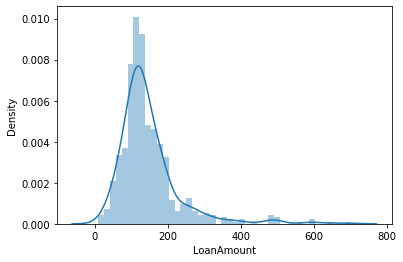

In [37]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

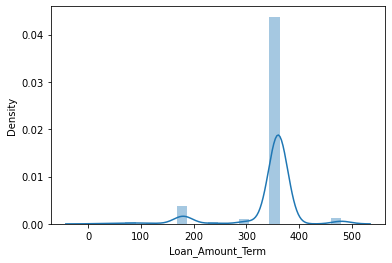

In [38]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

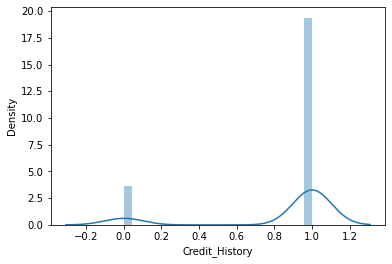

In [39]:
sns.distplot(df['Credit_History'])

In [40]:
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace=True)
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [41]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Adding mode value for filling nan teh categorical type 

In [42]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [43]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

there are no null values 

Transferring all object values by label encoding 

# Label encoder

In [44]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [45]:
df1.dtypes

Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int32
Loan_Status          int32
dtype: object

all values are now in integer values

# Resampling method

In [46]:
df2=df1
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,99,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

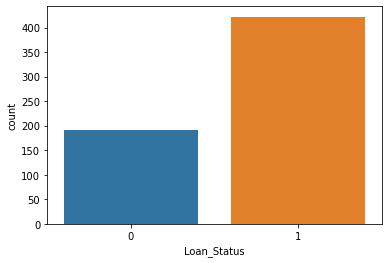

In [52]:
sns.countplot(x="Loan_Status",data=df2)

In [68]:
# class count
best_quality_count_0, best_quality_count_1 = df2['Loan_Status'].value_counts()
print('best_quality_count_0, :',best_quality_count_0, '\n best_quality_count_1 : ', best_quality_count_1)

best_quality_count_0, : 422 
 best_quality_count_1 :  192


In [137]:

# Separate class
best_quality_0 = df2[df2['Loan_Status'] == 1]
best_quality_1 = df2[df2['Loan_Status'] == 0]# print the shape of the class
print('best quality 0:', best_quality_0.shape)
print('best quality 1:', best_quality_1.shape)

best quality 0: (422, 12)
best quality 1: (192, 12)


In [138]:
best_quality_1_over = best_quality_1.sample(best_quality_count_0, replace=True)

df3 = pd.concat([best_quality_1_over, best_quality_0], axis=0)

print("total class of 1 and 0: \n",df3['Loan_Status'].value_counts())

total class of 1 and 0: 
 1    422
0    422
Name: Loan_Status, dtype: int64


In [139]:
df3.shape

(844, 12)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

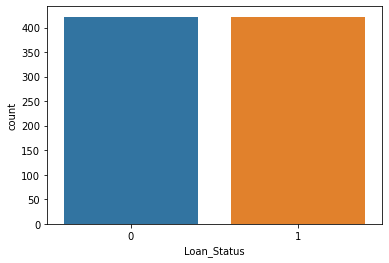

In [140]:
sns.countplot(x="Loan_Status",data=df3)

Class imbalance issue is resolved

# Distplot

<AxesSubplot:xlabel='Gender', ylabel='Density'>

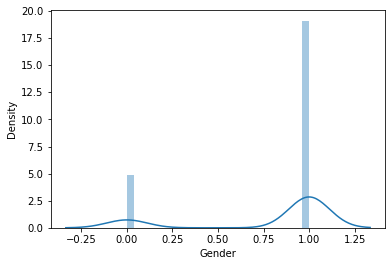

In [73]:
sns.distplot(df3['Gender'])


<AxesSubplot:xlabel='Married', ylabel='Density'>

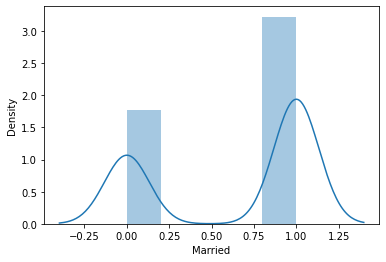

In [74]:
sns.distplot(df3['Married'])


<AxesSubplot:xlabel='Dependents', ylabel='Density'>

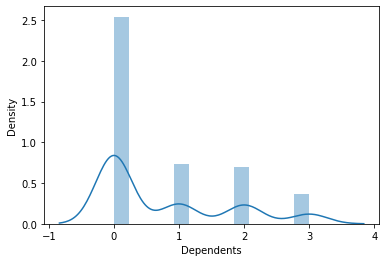

In [75]:
sns.distplot(df3['Dependents'])


<AxesSubplot:xlabel='Education', ylabel='Density'>

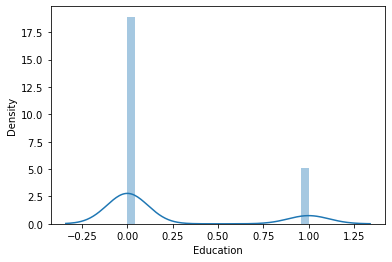

In [76]:
sns.distplot(df3['Education'])


<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

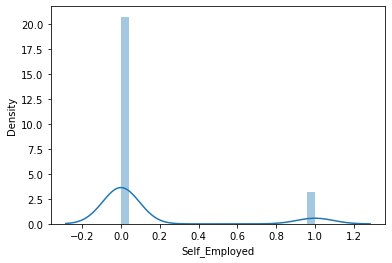

In [77]:
sns.distplot(df3['Self_Employed'])


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

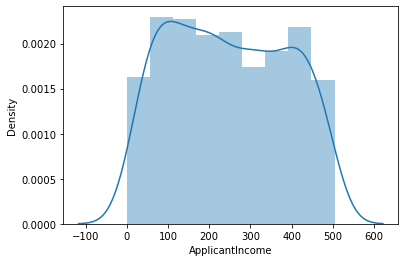

In [78]:
sns.distplot(df3['ApplicantIncome'])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

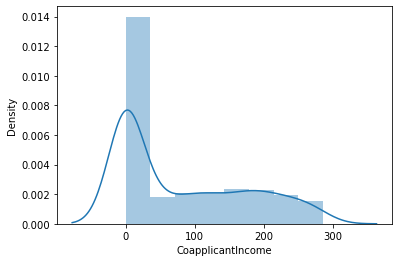

In [79]:
sns.distplot(df3['CoapplicantIncome'])


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

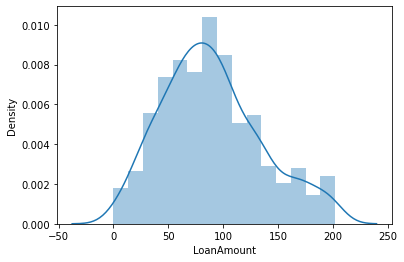

In [80]:
sns.distplot(df3['LoanAmount'])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

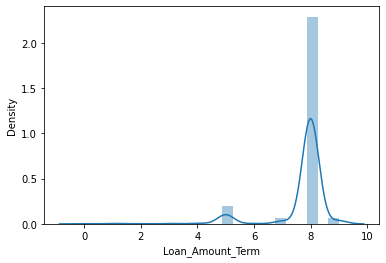

In [81]:
sns.distplot(df3['Loan_Amount_Term'])


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

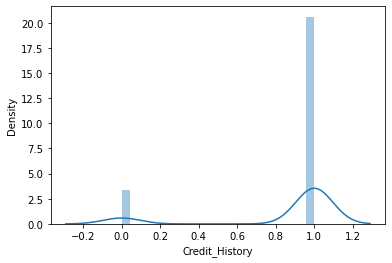

In [82]:
sns.distplot(df3['Credit_History'])


<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

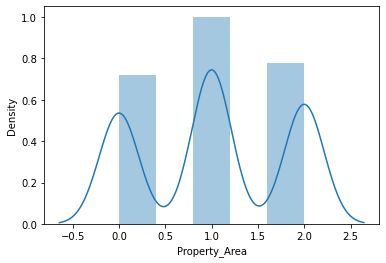

In [83]:
sns.distplot(df3['Property_Area'])


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

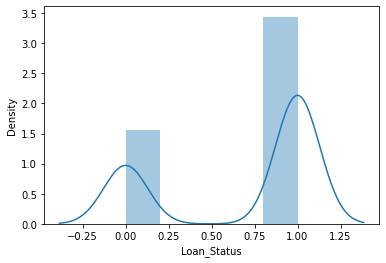

In [84]:
sns.distplot(df3['Loan_Status'])

No column is normally distributed and skewness is there

In [ ]:
# Boxplot to find the outliers in the columns

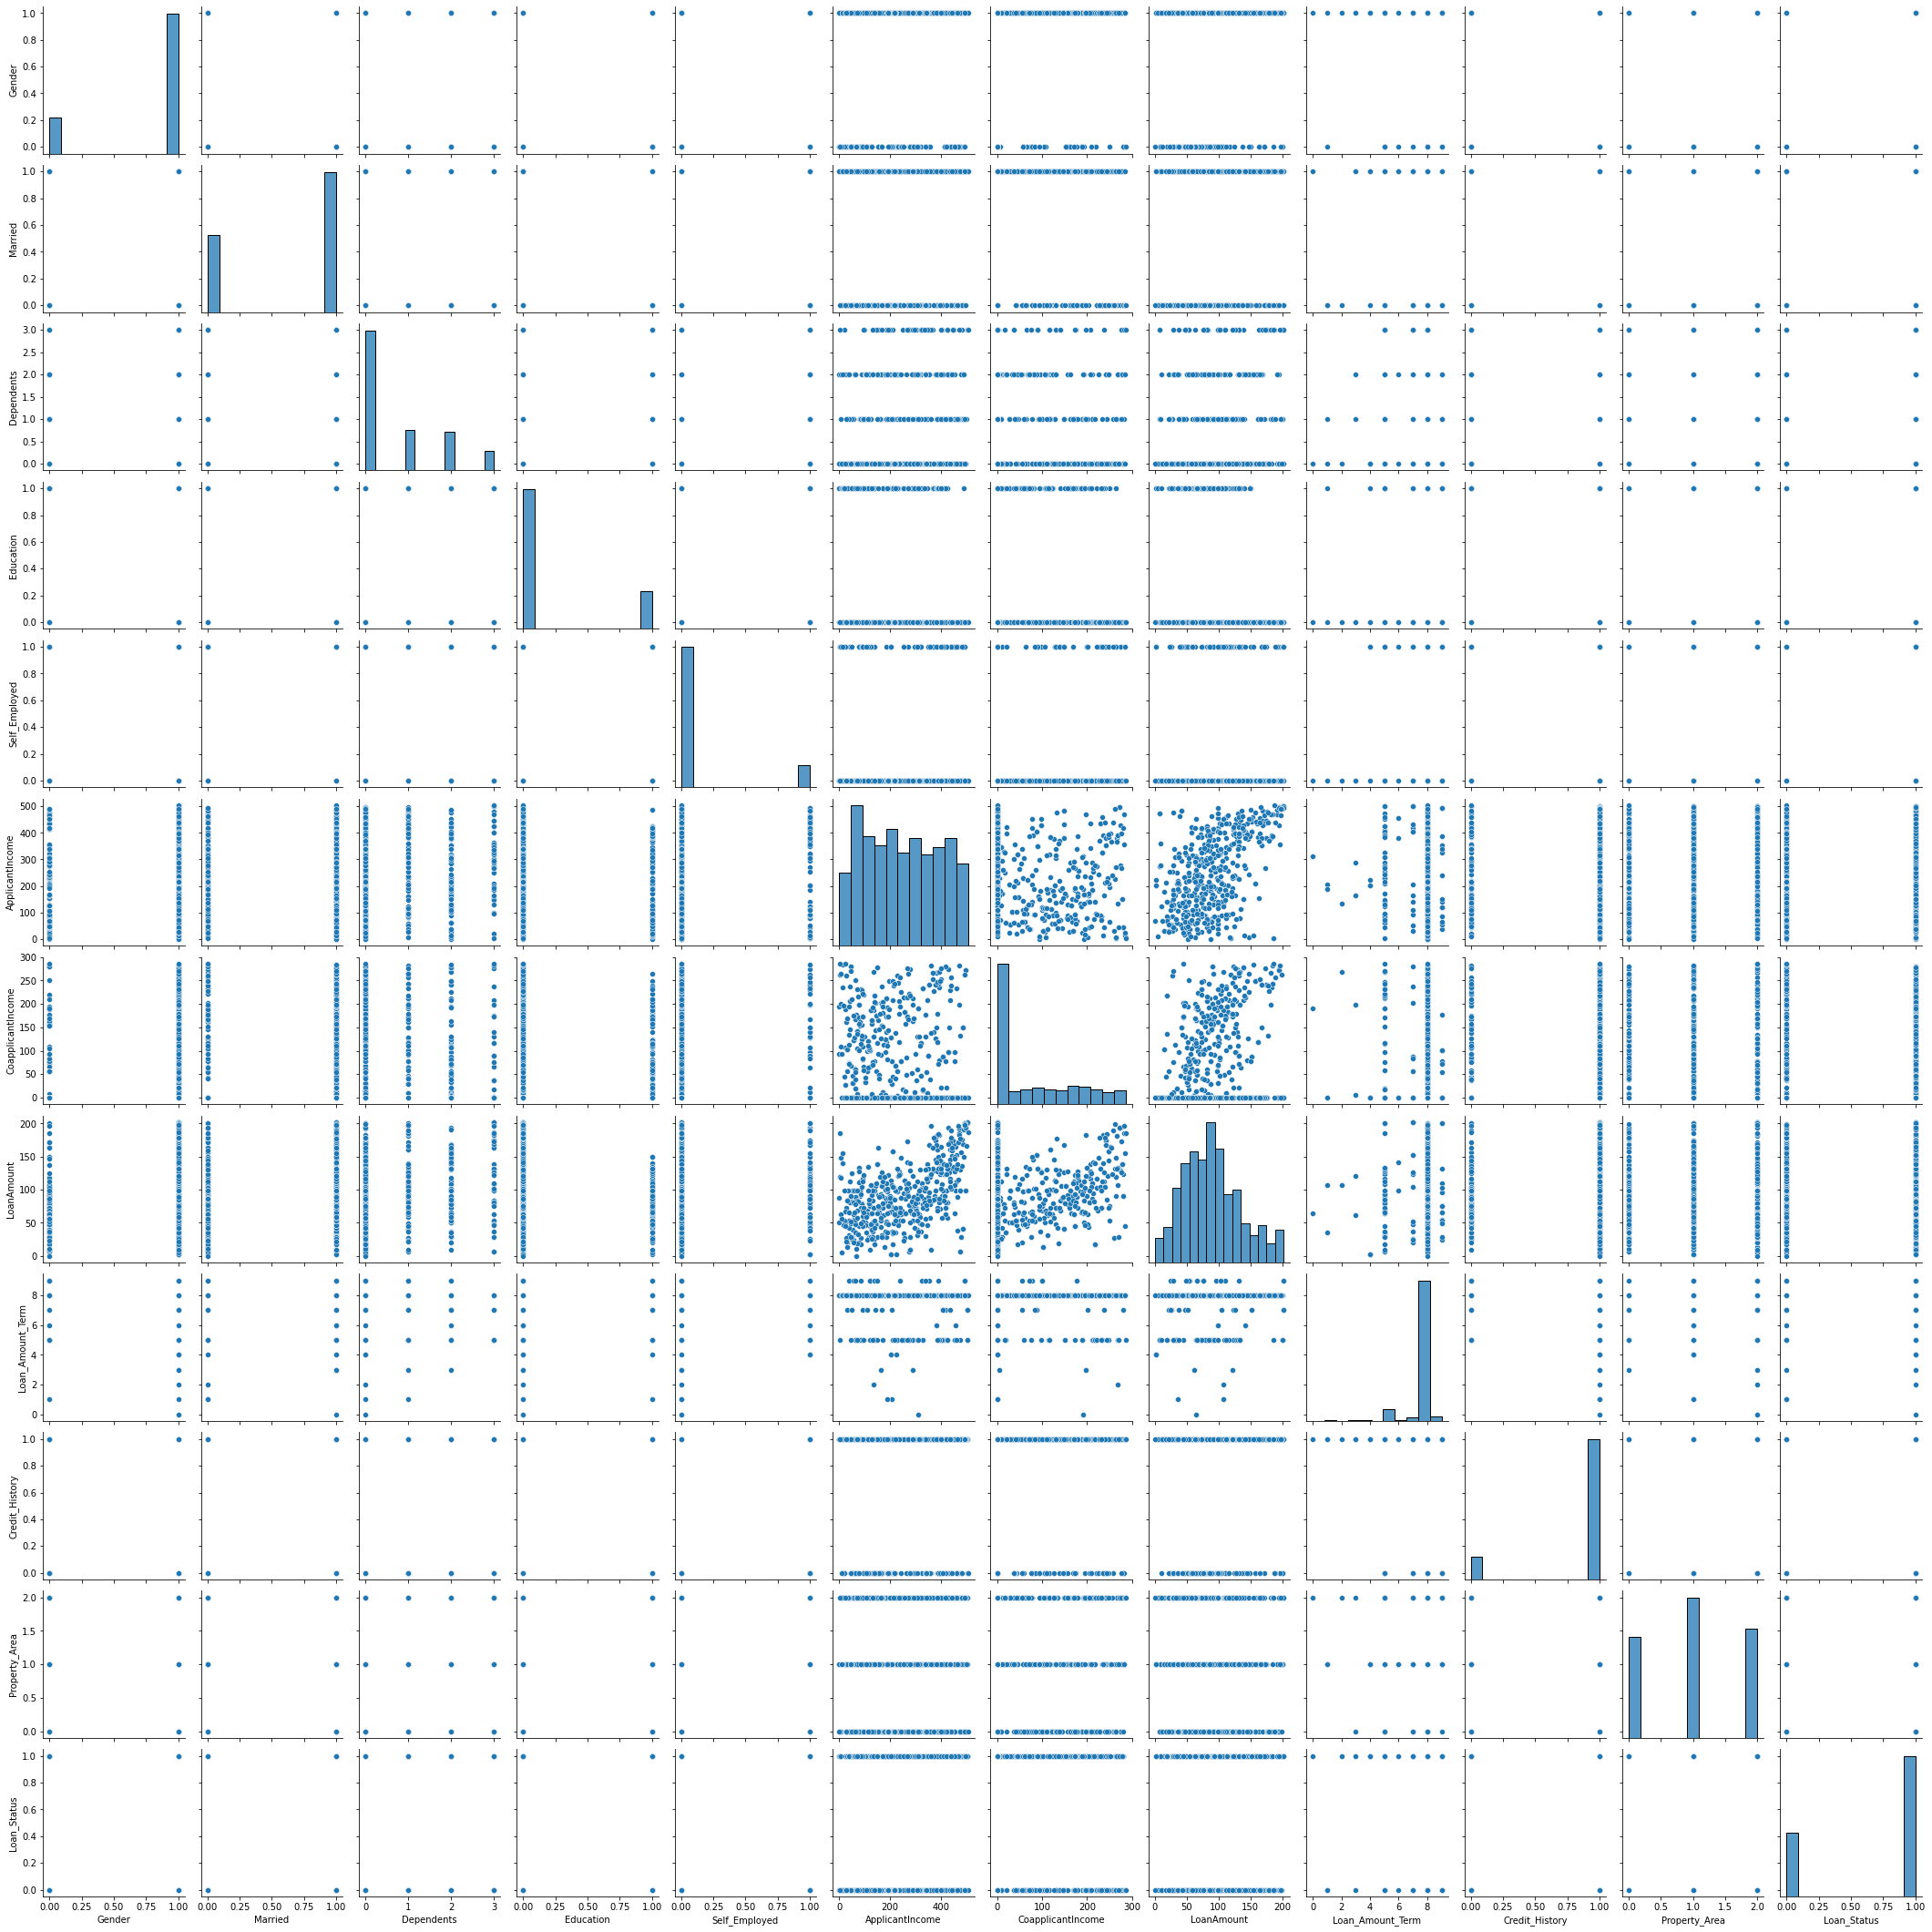

In [85]:
sns.pairplot(df3)


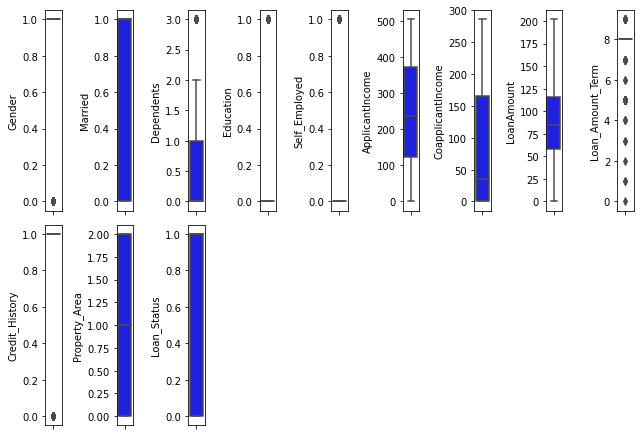

In [87]:
collist=df3.columns.values
ncol= 9
nrows= 9

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df3[collist[i]], color='blue', orient='x')
    plt.tight_layout()

Gender,Dependents,Education,Self employed,loan amount term,credit history columns have outliers

# TO remove the skewness 

In [89]:
df3.skew()

Gender              -1.475893
Married             -0.607305
Dependents           1.026425
Education            1.414725
Self_Employed        2.139216
ApplicantIncome      0.089747
CoapplicantIncome    0.701689
LoanAmount           0.474353
Loan_Amount_Term    -3.368970
Credit_History      -2.059922
Property_Area       -0.039312
Loan_Status         -0.809998
dtype: float64

most of the columns are left skewed

In [116]:
cor=df3.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.394044,0.207513,0.014512,-0.024873,0.038298,0.233175,0.159689,-0.063682,0.003343,0.056712,-0.018217
Married,0.394044,1.000000,0.333287,0.026296,0.004669,-0.011154,0.232616,0.153446,-0.072149,0.001081,0.021862,0.079513
Dependents,0.207513,0.333287,1.000000,0.038286,0.068602,0.159346,-0.075910,0.184162,-0.128621,-0.034941,0.045227,0.007960
Education,0.014512,0.026296,0.038286,1.000000,0.016635,-0.179839,-0.060766,-0.180149,-0.010431,-0.075218,-0.123457,-0.097590
Self_Employed,-0.024873,0.004669,0.068602,0.016635,1.000000,0.195246,-0.052902,0.134135,0.003075,-0.003270,0.006817,-0.000469
ApplicantIncome,0.038298,-0.011154,0.159346,-0.179839,0.195246,1.000000,-0.246302,0.532017,-0.029152,0.046519,-0.031891,-0.005304
CoapplicantIncome,0.233175,0.232616,-0.075910,-0.060766,-0.052902,-0.246302,1.000000,0.291164,-0.034218,-0.010832,-0.000310,0.024504
LoanAmount,0.159689,0.153446,0.184162,-0.180149,0.134135,0.532017,0.291164,1.000000,0.080115,0.015969,-0.022563,-0.014997
Loan_Amount_Term,-0.063682,-0.072149,-0.128621,-0.010431,0.003075,-0.029152,-0.034218,0.080115,1.000000,0.022385,-0.094692,0.008576
Credit_History,0.003343,0.001081,-0.034941,-0.075218,-0.003270,0.046519,-0.010832,0.015969,0.022385,1.000000,-0.006133,0.551996


<AxesSubplot:>

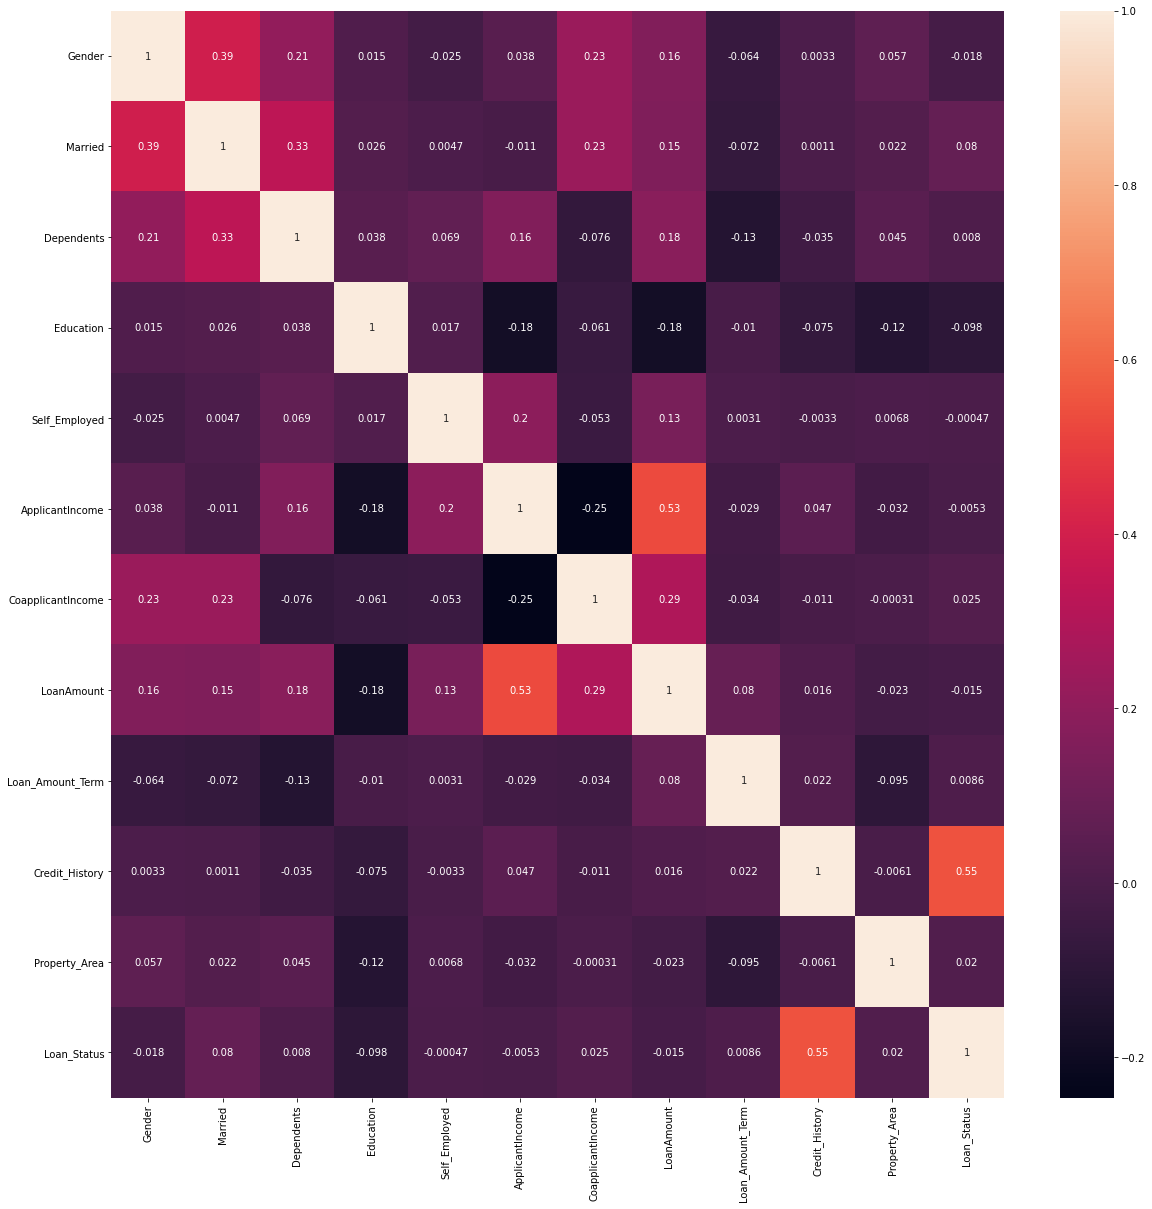

In [117]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

# Removing Outliers

In [141]:
from scipy.stats import zscore

z=np.abs(zscore(df3))

df4=df3[(z<3).all(axis=1)]

In [142]:
df4.shape


(830, 12)

In [143]:
df3.shape

(844, 12)

Outlier removal calculation 844-830/844 =  1.65 %

This is less than 8% and hence we can consider the df4

# Variance Inflation Factor to find multi collinearity

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [145]:
vif_data = pd.DataFrame()
vif_data["feature"] = df4.columns

In [146]:
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                            for i in range(len(df1.columns))]
print(vif_data)

              feature        VIF
0              Gender   6.334182
1             Married   3.843150
2          Dependents   1.841688
3           Education   1.336627
4       Self_Employed   1.205138
5     ApplicantIncome   7.214162
6   CoapplicantIncome   2.529805
7          LoanAmount   8.910275
8    Loan_Amount_Term  12.971246
9      Credit_History   9.295723
10      Property_Area   2.621370
11        Loan_Status   4.623913


values are not more than 25 still we can drop Loan amount term but will decide in further course of analysis time 

# Define Dependant and independent variable¶


In [147]:
df4

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
24,1,1,1,0,0,237,195,103,8,1,1,0
378,1,0,0,0,0,149,0,29,9,1,2,0
553,1,1,0,1,0,76,157,127,8,0,2,0
245,1,0,0,0,1,384,247,73,5,1,2,0
574,1,1,3,0,0,400,0,102,8,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,174,113,61,8,1,0,1
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1


In [148]:

x=df4.drop('Loan_Status',axis=1)
y=df4['Loan_Status']

# Scaling - Random state¶¶


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [154]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.9156626506024096 On random_state 1583


In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1583)

# Normalisation

In [156]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)

[[1.         1.         0.66666667 ... 0.25       1.         0.5       ]
 [1.         1.         0.         ... 0.75       1.         1.        ]
 [1.         1.         0.66666667 ... 0.75       1.         1.        ]
 ...
 [1.         1.         0.         ... 0.75       1.         0.        ]
 [1.         0.         0.         ... 0.75       1.         0.        ]
 [1.         1.         0.         ... 1.         1.         0.5       ]]


In [157]:
print(new_xtest)

[[1.         0.         0.         ... 0.75       0.         0.        ]
 [1.         1.         0.         ... 0.75       1.         1.        ]
 [1.         1.         0.         ... 0.75       1.         0.5       ]
 ...
 [1.         0.         0.         ... 0.75       0.         1.        ]
 [1.         1.         0.66666667 ... 0.75       1.         1.        ]
 [1.         0.         0.         ... 0.75       1.         0.5       ]]


Use new_xtest and new_xtrain from now

# Models for Classification problem

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [160]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred=DTC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       130
           1       0.95      0.87      0.91       119

    accuracy                           0.92       249
   macro avg       0.92      0.91      0.92       249
weighted avg       0.92      0.92      0.92       249



In [161]:
RFC=RandomForestClassifier()
RFC.fit(new_xtrain,y_train)
pred=RFC.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       130
           1       0.92      0.86      0.89       119

    accuracy                           0.90       249
   macro avg       0.90      0.89      0.89       249
weighted avg       0.90      0.90      0.90       249



In [162]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(new_xtrain, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [163]:
y_pred= classifier.predict(new_xtest)

In [164]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred=SV.predict(new_xtest)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       130
           1       0.70      0.79      0.74       119

    accuracy                           0.73       249
   macro avg       0.74      0.74      0.73       249
weighted avg       0.74      0.73      0.73       249



In [165]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
GBCpred = GBC.predict(new_xtest)
gbc=classification_report(y_test,GBCpred)
print(gbc)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       130
           1       0.85      0.84      0.85       119

    accuracy                           0.86       249
   macro avg       0.86      0.85      0.86       249
weighted avg       0.86      0.86      0.86       249



# Cross Validation Score Calculation

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8542168674698795


In [168]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8915662650602411


In [169]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.5108433734939759


In [170]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.808433734939759


Difference between Model Accuracy and Cross Validation score

DTC= 92-85.4 = 6.6

RFC= 90-89.15 = 0.85

SV= 73-51.08 = 21.92

GBC= 86-80.84 = 5.16

Random Forest Classifier has least difference also has highest accuracy hence we can consider the same


# Hyper Parameter Tuning

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [172]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [173]:
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001923D2B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000000192300D0>})

In [174]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2}
Best score is 0.8734939759036143


RandomizedSearchCV gives the best score which behaves the same in most of the cases as it goes through only a fixed number
of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters.

This approach reduces unnecessary computation

# Predictions

In [175]:
preds = RFC.predict(new_xtest)
print(preds[:30])
print(y_test[:30].values)

[0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0]
[1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0]


Predicted and true values are same

First row is predicted value

second row is actual value


# Final Model Creation

In [176]:
Final_mod = RandomForestClassifier(criterion= 'entropy', max_depth = None, max_features= 6, min_samples_leaf = 2)
Final_mod.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred)
print(acc*100)

87.55020080321285


In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [178]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC.fit(new_xtrain,y_train)
probs = RFC.predict(new_xtest)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
auc = auc(fpr, tpr)
print('AUC: %.3f' %auc)

AUC: 0.886


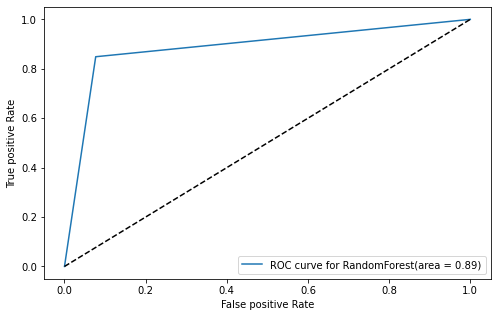

In [179]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve for RandomForest(area = %0.2f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='lower right')

# Confusion Matrix

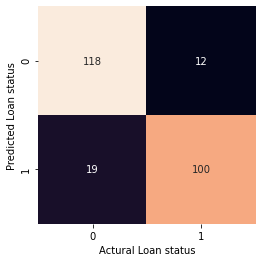

In [180]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural Loan status')
plt.ylabel('Predicted Loan status');

118+100 = 218 correct predictions

12+19 = 31 incorrect predictions

In [181]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       130
           1       0.89      0.84      0.87       119

    accuracy                           0.88       249
   macro avg       0.88      0.87      0.87       249
weighted avg       0.88      0.88      0.88       249



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

In [182]:
import joblib
joblib.dump(Final_mod,"Loan Application Status_Project.pkl")


['Loan Application Status_Project.pkl']